<a href="https://colab.research.google.com/github/Ploychomphoo/plantcv-6304800012/blob/main/image2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv

In [ ]:
!pip install plantcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 286 kB 30.5 MB/s 
     |████████████████████████████████| 41 kB 789 kB/s 


In [ ]:
import plantcv

In [ ]:
import plantcv.plantcv

In [ ]:
from plantcv import plantcv as pcv
import matplotlib

In [ ]:
class options:
    def __init__(self):
        self.image = "/content/apple.jfif"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

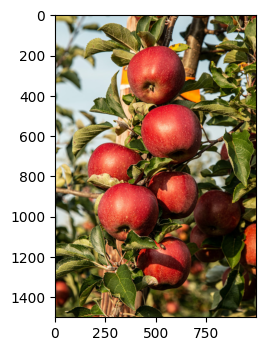

In [ ]:
img, path, filename = pcv.readimage(filename=args.image)

In [ ]:
print(img.shape)

(1500, 1000, 3)


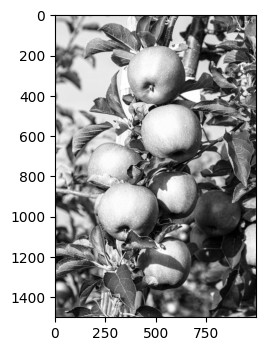

In [ ]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

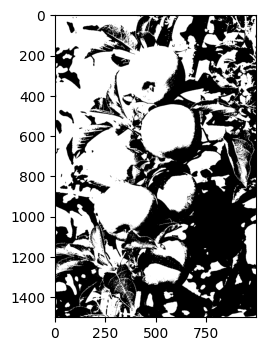

In [ ]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=120, max_value=255, object_type='light')

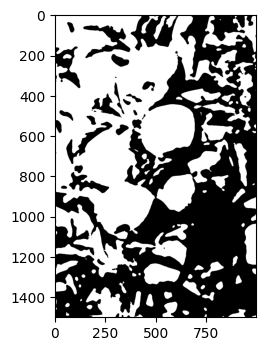

In [ ]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=15)

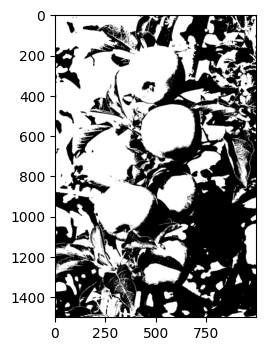

In [ ]:
gaussian_img = pcv.gaussian_blur(img=s_thresh, ksize=(5, 5), sigma_x=0, sigma_y=None)

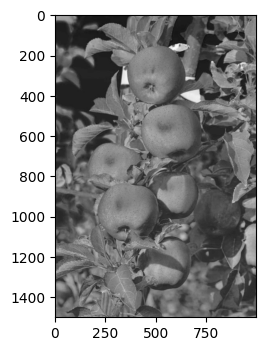

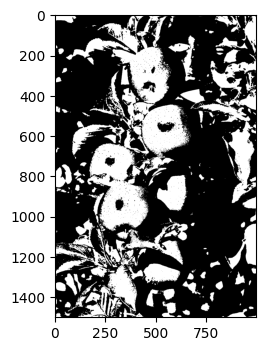

In [ ]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')

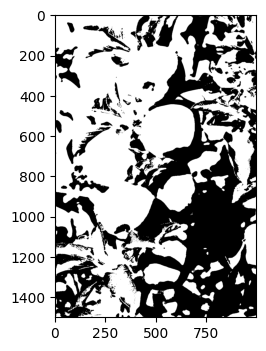

In [ ]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

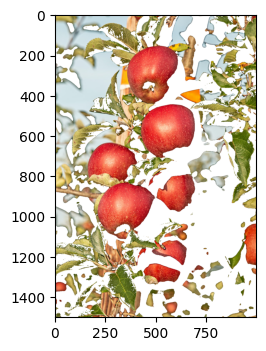

In [ ]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')